In [17]:
import pandas as pd

df = pd.read_csv("balanced_emotion_dataset_smart.csv")

df['text'] = df['text'].astype(str)

# Remove URLs
df['text'] = df['text'].str.replace(
    r'https?://\S+|www\.\S+',
    '',
    regex=True
)

# Remove hashtags (#word)
df['text'] = df['text'].str.replace(
    r'#\w+',
    '',
    regex=True
)

# Remove mentions (@word)
df['text'] = df['text'].str.replace(
    r'@\w+',
    '',
    regex=True
)

# Remove combined junk like @#word or #@word
df['text'] = df['text'].str.replace(
    r'[@#]\S+',
    '',
    regex=True
)

# Normalize spaces
df['text'] = df['text'].str.replace(
    r'\s+',
    ' ',
    regex=True
).str.strip()

# Save cleaned dataset
df.drop(columns=["emoji_emotion"], inplace=True)
df.to_csv(
    "balanced_emotion_dataset_smart_clean_text.csv",
    index=False
)


                                                text hidden_emotion_label  \
0                                                 🐮💚                 love   
1  Re manager pressure. 😊 kinda scared. fr yeah, ...                 fear   
2  unclear feedback rn. 🥰 appreciate you. I share...                 love   
3  College is fun 😊😊 lol Gotta read this chapter ...                anger   
4     Shelli was making fun of Kim K's ugly cry... 😂                  joy   

   hidden_emotion_flag  emoji_text_sentiment_match emotion_label  \
0                    0                           1          love   
1                    1                           0           joy   
2                    0                           1          love   
3                    1                           0           joy   
4                    0                           1           joy   

  primary_emoji emoji_emotion  hidden_emotion_id  \
0             💚          love                  3   
1             😊         

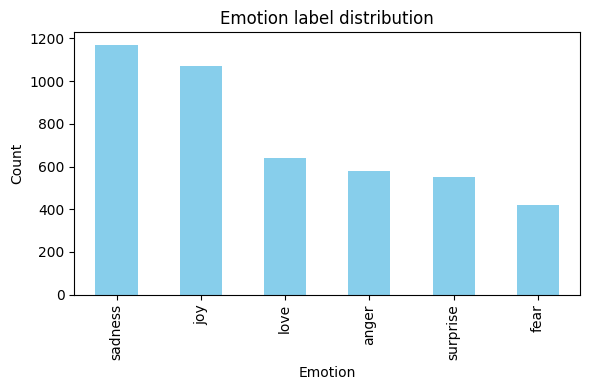

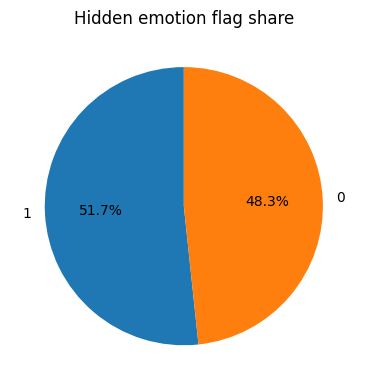

/opt/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128127 (\N{IMP}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128147 (\N{BEATING HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128149 (\N{TWO HEARTS}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128153 (\N{BLUE HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128155 (\N{YELLOW HEART}) missing from font(s) DejaVu Sans.
  fig

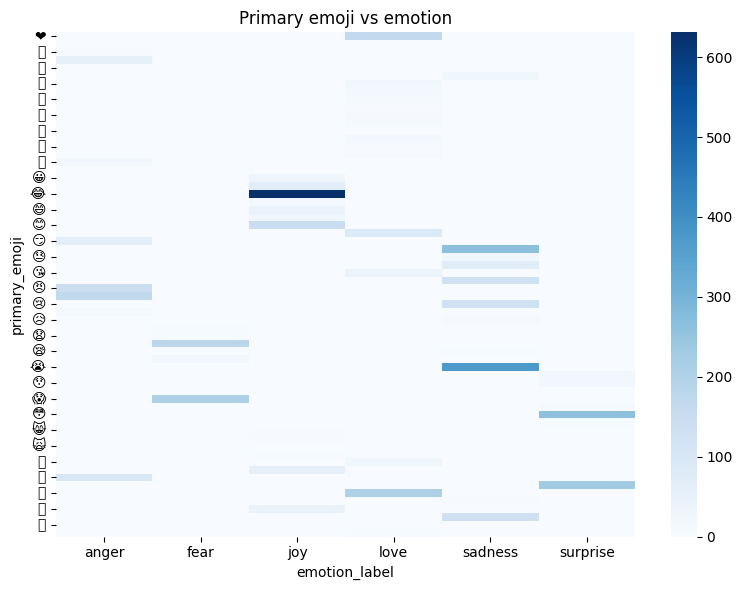

text                          4430
hidden_emotion_label          4433
hidden_emotion_flag           4433
emoji_text_sentiment_match    4433
emotion_label                 4433
primary_emoji                 4433
emoji_emotion                 2533
hidden_emotion_id             4433
text_clean                    4433
final_emotion                 4433
emotion_id                    4433
dtype: int64

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("balanced_emotion_dataset_smart_clean_text.csv")

print(df.head())
print(df.info())
print(df.describe(include="all"))

# Emotion distribution
plt.figure(figsize=(6,4))
df['emotion_label'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Emotion label distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Hidden vs non-hidden
plt.figure(figsize=(4,4))
df['hidden_emotion_flag'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title('Hidden emotion flag share')
plt.tight_layout()
plt.show()

# Emoji vs emotion heatmap
pivot = pd.crosstab(df['primary_emoji'], df['emotion_label'])
plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=False, cmap='Blues')
plt.title('Primary emoji vs emotion')
plt.tight_layout()
plt.show()
df.count()
